In [5]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ------- -------------------------------- 1.8/9.3 MB 12.6 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.3 MB 11.4 MB/s eta 0:00:01
   -------------------------- ------------- 6.0/9.3 MB 11.5 MB/s eta 0:00:01
   -------------------------- ------------- 6.0/9.3 MB 11.5 MB/s eta 0:00:01
   ---------------------------- ----------- 6.6/9.3 MB 6.8 MB/s eta 0:00:01
   ------------------------------------- -- 8.7/9.3 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 6.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   - -------------------------------------- 1.3/42.2 MB 6.1 MB/s eta 0:00:07
   - -------------------------------------- 2.1/42.2 MB 4.9 MB/s eta 0:00:09
   -- ------------------------------------- 2.4/42.2 MB 3.7 MB/s eta 0:00:11
   -- ------------------------------------- 2.6/42.2 MB 3.2 MB/s eta 0:00:13
   -- -----------

In [12]:
pip install pandas

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ------- -------------------------------- 2.1/10.8 MB 16.8 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.8 MB 12.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.8 MB 12.6 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.8 MB 12.6 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.8 MB 9.1 MB/s eta 0:00:01
   --------------------------------- ------ 8.9/10.8 MB 7.6 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.8 MB 6.9 MB/s eta 0:00:01
   -------------------------------------- - 10.5/10.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
!{sys.executable} -m pip install tensorflow;
dataset=pd.read_csv('almond.csv',dtype={'Length':float})
col_names=dataset.columns
dataset=dataset[col_names[1::]]
dataset=dataset.drop(index=0)
features=dataset[col_names[1:-1]]
targets=dataset[col_names[-1]]

##For imputation of data, i chose to put a 0 . The scaling of the dataset will be form -1 to 1  and the type column will be
## encoded to a integer -1,0,1 for the three types of almonds. The idea behind using -1 to 1 is to ensure 0 centering of inputs and 
##outputs to successive activation functions and nodes in the NN to minimize biases etc . It also conventinetly provides
##a numerically neutral value for unknowns hence the NN can intepret that information as not adding value (unknown). 
##additionally, we adjust -1 and 1 to -0.9 and 0.9. This is for the activation functions, to help minimize saturation and 
##the optimizer chasing gradients when we know it is sufficiently close to the answer to make a choice. Furthermore, looking at 
## the data generated from formulas, if any of the parameters are 0 then the function would evaulate to either 0 ,1, undefined, inf
## practically, we would only work with values that give numerical values hence using 0 is reaosnable as it represents
## no 'activation' of that specific feature due to non activation of the determining features.
targets=np.array(targets)
for i in range(len(targets)):
    if targets[i]=='MAMRA':
        targets[i]=-0.9
    if targets[i]=='REGULAR':
        targets[i]=0
    if targets[i]=='SANORA':
        targets[i]=0.9      
        
train_feat,test_feat,train_targ,test_targ=train_test_split(features,targets,test_size=0.15)
train_feat,valid_feat,train_targ,valid_targ=train_test_split(train_feat,train_targ,test_size=0.18)##final rations: 0.7,0.15,0.15
def scaler(array):
    low=np.min(array)
    up=np.max(array)
    for i in range(len(array)):
        array[i]=-0.9+(((array[i]-low)*(0.9+0.9))/(up-low))
    return array,low,up
def trained_scaler(array,low,up):
    for i in range(len(array)):
        array[i]=-0.9+(((array[i]-low)*(0.9+0.9))/(up-low))
    return array
feat_lows=[]
feat_highs=[]
col_names=train_feat.columns
for ind in range(len(col_names)):
    array=np.array(train_feat[col_names[ind]].values)
    replacement,low,up=scaler(array)
    feat_lows.append(low)
    feat_highs.append(up)
    train_feat[col_names[ind]]=replacement
for ind in range(len(col_names)):
    array=np.array(valid_feat[col_names[ind]].values)
    array2=np.array(test_feat[col_names[ind]].values)
    replacement=trained_scaler(array,feat_lows[ind],feat_highs[ind])
    replacement2=trained_scaler(array2,feat_lows[ind],feat_highs[ind])
    valid_feat[col_names[ind]]=replacement
    test_feat[col_names[ind]]=replacement2
###Finally, we split the training data


In [193]:
##converting targets to binary 

bi_train_targ=np.zeros((len(train_targ),3))
for ind in range(len(train_targ)):
    if train_targ[ind]==-0.9:
        bi_train_targ[ind,:]=[0.9,0,0]
    if train_targ[ind]==0:
        bi_train_targ[ind,:]=[0,0.9,0]
    if train_targ[ind]==0.9:
        bi_train_targ[ind,:]=[0,0,0.9]

bi_valid_targ=np.zeros((len(valid_targ),3))
for ind in range(len(valid_targ)):
    if valid_targ[ind]==-0.9:
        bi_valid_targ[ind,:]=[0.9,0,0]
    if valid_targ[ind]==0:
        bi_valid_targ[ind,:]=[0,0.9,0]
    if valid_targ[ind]==0.9:
        bi_valid_targ[ind,:]=[0,0,0.9]
bi_test_targ=np.zeros((len(test_targ),3))
for ind in range(len(test_targ)):
    if test_targ[ind]==-0.9:
        bi_test_targ[ind,:]=[0.9,0,0]
    if test_targ[ind]==0:
        bi_test_targ[ind,:]=[0,0.9,0]
    if test_targ[ind]==0.9:
        bi_test_targ[ind,:]=[0,0,0.9]
train_feat=np.array(train_feat)
valid_feat=np.array(valid_feat)
bi_train_targ=np.array(bi_train_targ)
bi_valid_targ=np.array(bi_valid_targ)
bi_test_targ=np.array(bi_test_targ)

125
138139.68294008306


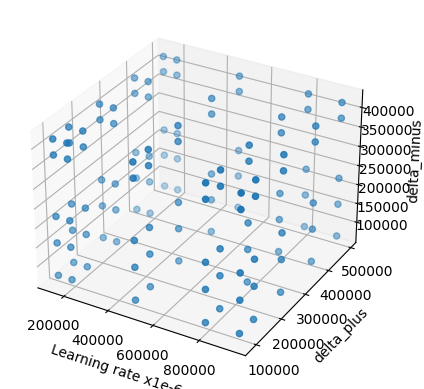

In [176]:
###Grid space used for RProp , 64 points in the space give sufficient coverage and i can train each for 4000 iter 
## and still have a total of 256000 epochs which is not too long for training 
from scipy.stats import qmc
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
hyper=qmc.LatinHypercube(d=3)
samples=hyper.random(5)
upper=[1e6,0.5*1e6,0.5*1e6] ##will multiply by 1e-6 at some point, also the min changes each time we generate
lower=[0,0,0]
scaled=qmc.scale(samples,lower,upper)
X,Y,Z=np.meshgrid(scaled[:,0],scaled[:,1],scaled[:,2])
ax.set_xlabel('Learning rate x1e-6')
ax.set_ylabel('delta_plus')
ax.set_zlabel('delta_minus')
print(len(X.flatten()))
plot=ax.scatter(X,Y,Z)
print(np.min(X))

138139.68294008306 88214.05341370963 418966.71842312766
Execution time: 3348.7609527111053


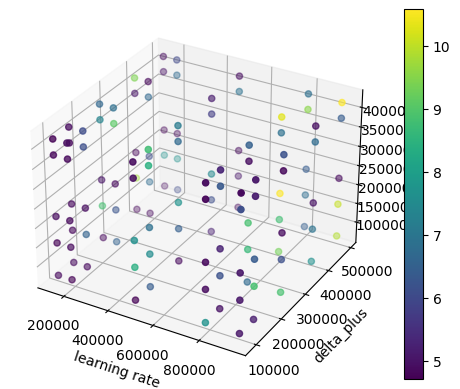

In [178]:
import time
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Initialize the timer
start = time.time()  ###NB had to first ensure train feat and targ are arrays not dataframes

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units, output_activation):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)
        self.output_activation = output_activation

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.output_activation(self.fc2(x))
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad
            
            if grad is None:
                continue
            
            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus, 
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()




grid_sig_loss2 = np.zeros((len(X), len(X), len(X)))
grid_sig_acc2 = np.zeros((len(X), len(X), len(X)))
kf = KFold(n_splits=5, shuffle=True)

# Main loop
for indL in range(len(X)):
    for indP in range(len(X)):
        for indM in range(len(X)):
            model = SimpleModel(input_dim=12, hidden_units=310, output_activation=nn.Sigmoid())
            optimizer = RProp(model.parameters(),
                              lr=X[indL, indP, indM]*1e-6,
                              delta_plus=Y[indL, indP, indM]*1e-6,
                              delta_minus=Z[indL, indP, indM]*1e-6)
            
            batch_loss = []
            ave_acc = []
            for train_index, valid_index in kf.split(train_feat):
                train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
                labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]

                # Convert to tensors
                train_fold = torch.tensor(train_fold, dtype=torch.float32)
                labels_train = torch.tensor(labels_train, dtype=torch.float32)
                valid_fold = torch.tensor(valid_fold, dtype=torch.float32)
                labels_valid = torch.tensor(labels_valid, dtype=torch.float32)

                # Training loop
                for epoch in range(2000):
                    model.train()
                    optimizer.zero_grad()  # Zero the gradients

                    outputs = model(train_fold)
                    loss = loss_func(labels_train, outputs)
                    loss.backward()  # Compute gradients

                    optimizer.step()  # Update weights

                # Collecting validation loss and accuracy
                model.eval()
                with torch.no_grad():
                    val_outputs = model(valid_fold)
                    val_loss = loss_func(labels_valid, val_outputs)
                    val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid, dim=1)).float().mean().item()

                batch_loss.append(val_loss.item())
                ave_acc.append(val_acc)

            grid_sig_loss2[indL, indP, indM] = np.mean(batch_loss)
            grid_sig_acc2[indL, indP, indM] = np.mean(ave_acc)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter(X, Y, Z, c=grid_sig_loss2, cmap='viridis')
fig.colorbar(plot) 
ax.set_xlabel('learning rate')
ax.set_ylabel('delta_plus')
ax.set_zlabel('delta_minus')
ind = np.argmin(grid_sig_loss2.flatten())
print(X.flatten()[ind], Y.flatten()[ind], Z.flatten()[ind])

# Print execution time
print("Execution time:", time.time() - start)


In [183]:
import time
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Initialize the timer
start = time.time()  ###NB had to first ensure train feat and targ are arrays not dataframes

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units, output_activation):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)
        self.output_activation = output_activation

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.output_activation(self.fc2(x))
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad
            
            if grad is None:
                continue
            
            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus, 
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()




grid_sig_loss3 = np.zeros((len(X), len(X), len(X)))
grid_sig_acc3 = np.zeros((len(X), len(X), len(X)))
kf = KFold(n_splits=5, shuffle=True)

# Main loop
for indL in range(len(X)):
    for indP in range(len(X)):
        for indM in range(len(X)):
            model = SimpleModel(input_dim=12, hidden_units=310, output_activation=nn.Sigmoid())
            optimizer = RProp(model.parameters(),
                              lr=X[indL, indP, indM]*1e-6,
                              delta_plus=Y[indL, indP, indM]*1e-6,
                              delta_minus=Z[indL, indP, indM]*1e-6)
            
            batch_loss = []
            ave_acc = []
            for train_index, valid_index in kf.split(train_feat):
                train_fold, valid_fold = train_feat[train_index], train_feat[valid_index]
                labels_train, labels_valid = bi_train_targ[train_index], bi_train_targ[valid_index]

                # Convert to tensors
                train_fold = torch.tensor(train_fold, dtype=torch.float32)
                labels_train = torch.tensor(labels_train, dtype=torch.float32)
                valid_fold = torch.tensor(valid_fold, dtype=torch.float32)
                labels_valid = torch.tensor(labels_valid, dtype=torch.float32)

                # Training loop
                for epoch in range(2000):
                    model.train()
                    optimizer.zero_grad()  # Zero the gradients

                    outputs = model(train_fold)
                    loss = loss_func(labels_train, outputs)
                    loss.backward()  # Compute gradients

                    optimizer.step()  # Update weights

                # Collecting validation loss and accuracy
                model.eval()
                with torch.no_grad():
                    val_outputs = model(valid_fold)
                    val_loss = loss_func(labels_valid, val_outputs)
                    val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid, dim=1)).float().mean().item()

                batch_loss.append(val_loss.item())
                ave_acc.append(val_acc)

            grid_sig_loss3[indL, indP, indM] = np.mean(batch_loss)
            grid_sig_acc3[indL, indP, indM] = np.mean(ave_acc)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.scatter(X, Y, Z, c=grid_sig_loss3, cmap='viridis')
fig.colorbar(plot) 
ax.set_xlabel('learning rate')
ax.set_ylabel('delta_plus')
ax.set_zlabel('delta_minus')
ind = np.argmin(grid_sig_loss2.flatten())
print(X.flatten()[ind], Y.flatten()[ind], Z.flatten()[ind])

# Print execution time
print("Execution time:", time.time() - start)


KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


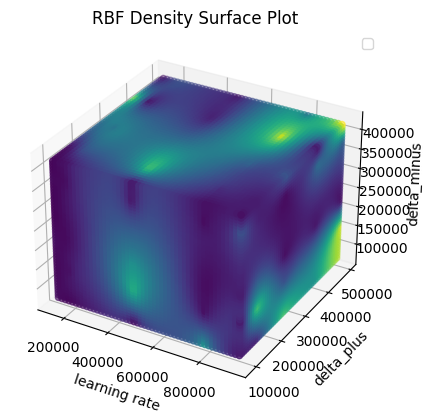

138139.68294008306 485318.3363139725 262521.37569358316


In [179]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D


x_data = X
y_data = Y
z_data = Z
color=grid_sig_loss2
# Fit RBF
rbf = Rbf(x_data, y_data, z_data,color,function='linear')  # You can choose 'linear', 'cubic', etc.

# Create grid for evaluation
grid_x, grid_y,grid_z = np.linspace(np.min(x_data), np.max(x_data), 50), np.linspace(np.min(y_data), np.max(y_data), 50),np.linspace(np.min(z_data), np.max(z_data), 50)
grid_x, grid_y,grid_z = np.meshgrid(grid_x, grid_y,grid_z)
grid_c = rbf(grid_x, grid_y,grid_z)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.scatter(grid_x, grid_y, grid_z, c=grid_c,cmap='viridis')


ax.set_xlabel('learning rate')
ax.set_ylabel('delta_plus')
ax.set_zlabel('delta_minus')
ax.set_title('RBF Density Surface Plot')
plt.legend()
plt.show()
ind=np.argmin(grid_c.flatten())
print(grid_x.flatten()[ind],grid_y.flatten()[ind],grid_z.flatten()[ind])

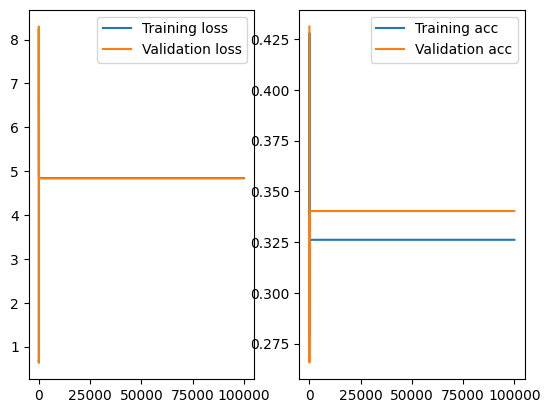

Execution time: 426.53024458885193


In [181]:
####training using interpolated results
import time
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad
            
            if grad is None:
                continue
            
            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus,
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()

# Main training parameters
input_dim = 12
hidden_units = 310  # Set according to your needs
epochs = 100000
batch_size = 32

# Prepare for loss and accuracy tracking
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined
inputs_valid = torch.tensor(valid_feat, dtype=torch.float32)  # Ensure valid_feat is defined
labels_valid = torch.tensor(bi_valid_targ, dtype=torch.float32)  # Ensure bi_valid_targ is defined

# Initialize model and optimizer
model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
optimizer = RProp(model.parameters(), lr=138139.68294008306*1e-6, delta_plus=485318.3363139725*1e-6,delta_minus= 262521.37569358316*1e-6)

# Main training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradients

    # Get training outputs and compute loss
    outputs = model(inputs_training)
    loss = loss_func(labels_training, outputs)
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Store training loss
    training_loss.append(loss.item())

    # Calculate training accuracy
    train_acc = (torch.argmax(outputs, dim=1) == torch.argmax(labels_training, dim=1)).float().mean().item()
    training_acc.append(train_acc)

    # Validate after every epoch
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid)
        val_loss = loss_func(labels_valid, val_outputs)
        val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid, dim=1)).float().mean().item()

    validation_loss.append(val_loss.item())
    validation_acc.append(val_acc)

# Plotting results
plt.subplot(121)
plt.plot(np.linspace(0, epochs, epochs), training_loss, label='Training loss')
plt.plot(np.linspace(0, epochs, epochs), validation_loss, label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0, epochs, epochs), training_acc, label='Training acc')
plt.plot(np.linspace(0, epochs, epochs), validation_acc, label='Validation acc')
plt.legend()
plt.show()
# Print execution time
print("Execution time:", time.time() - start)


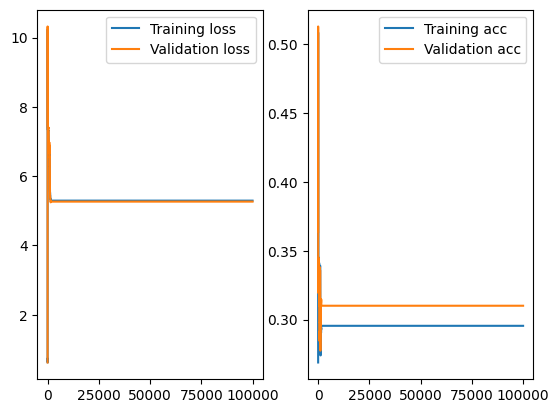

Execution time: 398.65930342674255


In [182]:
####training using grid search results
import time
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad
            
            if grad is None:
                continue
            
            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus,
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()

# Main training parameters
input_dim = 12
hidden_units = 310  # Set according to your needs
epochs = 100000
batch_size = 32

# Prepare for loss and accuracy tracking
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined
inputs_valid = torch.tensor(valid_feat, dtype=torch.float32)  # Ensure valid_feat is defined
labels_valid = torch.tensor(bi_valid_targ, dtype=torch.float32)  # Ensure bi_valid_targ is defined

# Initialize model and optimizer
model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
optimizer = RProp(model.parameters(), lr=138139.68294008306*1e-6, delta_plus= 88214.053413709635*1e-6,delta_minus= 418966.71842312766*1e-6)

# Main training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradients

    # Get training outputs and compute loss
    outputs = model(inputs_training)
    loss = loss_func(labels_training, outputs)
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Store training loss
    training_loss.append(loss.item())

    # Calculate training accuracy
    train_acc = (torch.argmax(outputs, dim=1) == torch.argmax(labels_training, dim=1)).float().mean().item()
    training_acc.append(train_acc)

    # Validate after every epoch
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid)
        val_loss = loss_func(labels_valid, val_outputs)
        val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid, dim=1)).float().mean().item()

    validation_loss.append(val_loss.item())
    validation_acc.append(val_acc)

# Plotting results
plt.subplot(121)
plt.plot(np.linspace(0, epochs, epochs), training_loss, label='Training loss')
plt.plot(np.linspace(0, epochs, epochs), validation_loss, label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0, epochs, epochs), training_acc, label='Training acc')
plt.plot(np.linspace(0, epochs, epochs), validation_acc, label='Validation acc')
plt.legend()
plt.show()
# Print execution time
print("Execution time:", time.time() - start)


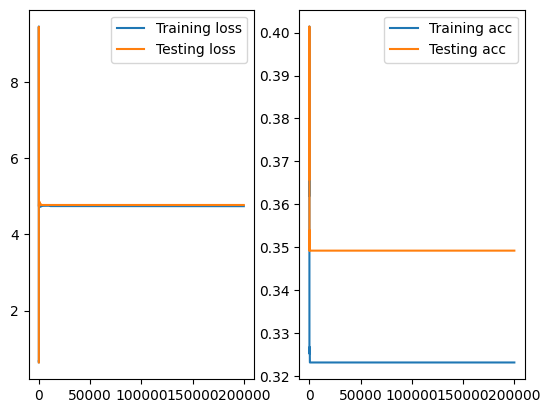

Execution time: 919.6469905376434


In [199]:
####training using interpolated results
import time
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad
            
            if grad is None:
                continue
            
            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus,
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()

# Main training parameters
input_dim = 12
hidden_units = 310  # Set according to your needs
epochs = 200000
batch_size = 32

# Prepare for loss and accuracy tracking
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined
inputs_valid = torch.tensor(np.array(test_feat), dtype=torch.float32)  # Ensure valid_feat is defined
labels_valid = torch.tensor(bi_test_targ, dtype=torch.float32)  # Ensure bi_valid_targ is defined

# Initialize model and optimizer
model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
optimizer = RProp(model.parameters(), lr=138139.68294008306*1e-6, delta_plus=485318.3363139725*1e-6,delta_minus= 262521.37569358316*1e-6)

# Main training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Zero the gradients

    # Get training outputs and compute loss
    outputs = model(inputs_training)
    loss = loss_func(labels_training, outputs)
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights

    # Store training loss
    training_loss.append(loss.item())

    # Calculate training accuracy
    train_acc = (torch.argmax(outputs, dim=1) == torch.argmax(labels_training, dim=1)).float().mean().item()
    training_acc.append(train_acc)

    # Validate after every epoch
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid)
        val_loss = loss_func(labels_valid, val_outputs)
        val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid, dim=1)).float().mean().item()

    validation_loss.append(val_loss.item())
    validation_acc.append(val_acc)

# Plotting results
plt.subplot(121)
plt.plot(np.linspace(0, epochs, epochs), training_loss, label='Training loss')
plt.plot(np.linspace(0, epochs, epochs), validation_loss, label='Testing loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0, epochs, epochs), training_acc, label='Training acc')
plt.plot(np.linspace(0, epochs, epochs), validation_acc, label='Testing acc')
plt.legend()
plt.show()
# Print execution time
print("Execution time:", time.time() - start)


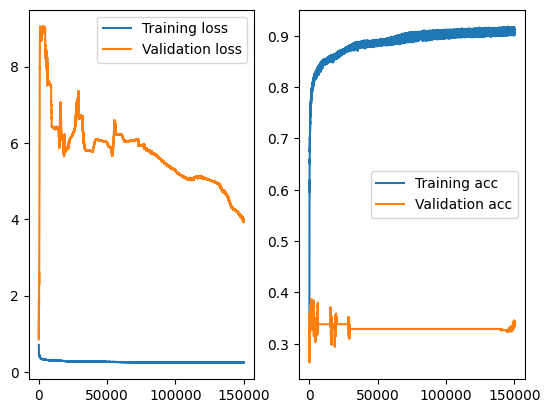

Execution time:  344.60775876045227


In [64]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

start = time.time()

# Define the model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_units, output_activation):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)
        self.activation = nn.Tanh()
        self.output_activation = nn.Sigmoid() if output_activation == 'sigmoid' else None

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        if self.output_activation:
            x = self.output_activation(x)
        return x

# Custom loss function
def loss_func(predictions, labels):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# Function to ensure tensor conversion
def to_tensor(data):
    if isinstance(data, np.ndarray):  # Check if it's a NumPy array
        return torch.tensor(data, dtype=torch.float32)  # Convert to tensor
    elif isinstance(data, torch.Tensor):  # If it's already a tensor
        return data.clone().detach()  # Just clone and detach
    raise TypeError("Unsupported data type for conversion to tensor.")

# Training settings
input_dim = 12
hidden_units = 35
output_activation = 'sigmoid'
model = SimpleNN(input_dim, hidden_units, output_activation)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=65596.93677367667e-7, betas=(0.838518587915633, 0.3984271570599476))

# Training variables
epochs = 150000
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert inputs to tensors once outside the loop
inputs_training_tensor = to_tensor(inputs_training)
labels_training_tensor = to_tensor(labels_training)
inputs_valid_tensor = to_tensor(inputs_valid)
labels_valid_tensor = to_tensor(labels_valid)

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(inputs_training_tensor)
    
    # Compute loss
    loss = loss_func(outputs, labels_training_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Store training loss
    training_loss.append(loss.item())
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid_tensor)
        val_loss = loss_func(val_outputs, labels_valid_tensor)
        validation_loss.append(val_loss.item())

    # Compute accuracy
    _, predicted = torch.max(outputs, 1)
    training_acc.append((predicted == labels_training_tensor.argmax(dim=1)).float().mean().item())
    _, val_predicted = torch.max(val_outputs, 1)
    validation_acc.append((val_predicted == labels_valid_tensor.argmax(dim=1)).float().mean().item())

# Plotting results
plt.subplot(121)
plt.plot(np.linspace(0, epochs, epochs), training_loss, label='Training loss')
plt.plot(np.linspace(0, epochs, epochs), validation_loss, label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0, epochs, epochs), training_acc, label='Training acc')
plt.plot(np.linspace(0, epochs, epochs), validation_acc, label='Validation acc')
plt.legend()
plt.show()

# Measure execution time
print("Execution time: ", time.time() - start)


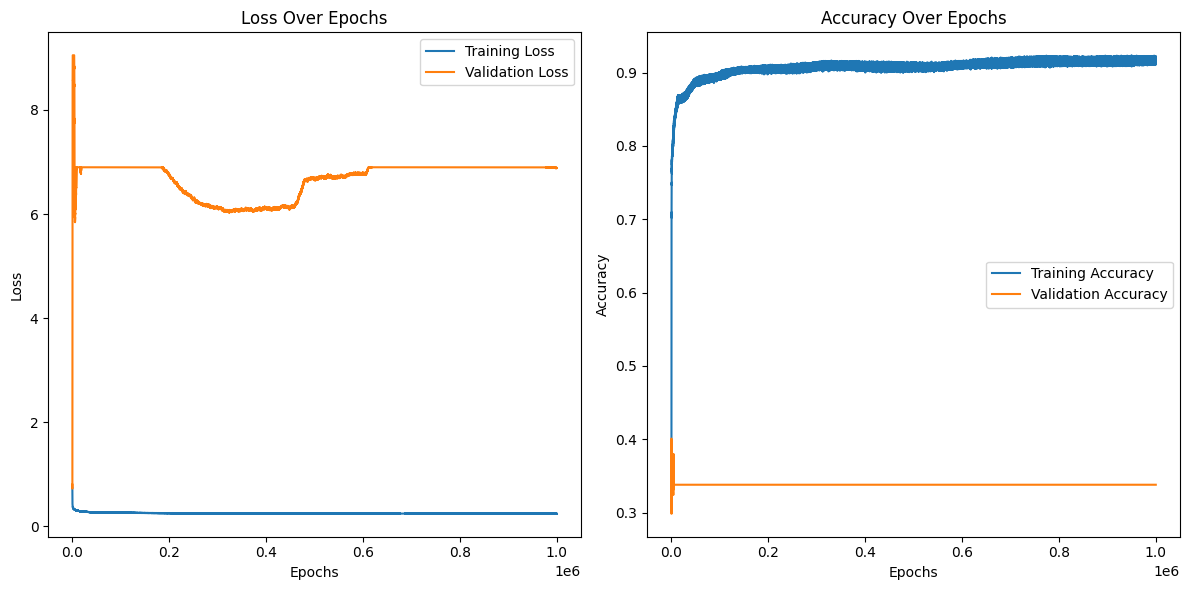

Execution time: 3098.00634431839


In [69]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad

            if grad is None:
                continue

            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus,
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()

# Training settings
input_dim = 12
hidden_units = 35
epochs = 1000000
batch_size = 32

# Prepare for loss and accuracy tracking
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined
inputs_valid = torch.tensor(valid_feat, dtype=torch.float32)  # Ensure valid_feat is defined
labels_valid = torch.tensor(bi_valid_targ, dtype=torch.float32)  # Ensure bi_valid_targ is defined

# Initialize model and optimizers
model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
rprop_optimizer = RProp(model.parameters(), lr=3368.793160186068*1e-6, delta_plus=31623.13926044511*1e-6, delta_minus=10771.561362750432*1e-6)
adam_optimizer = optim.Adam(model.parameters(), lr=65596.93677367667e-7, betas=(0.838518587915633, 0.3984271570599476))

# Main training loop
for epoch in range(epochs):
    model.train()
    rprop_optimizer.zero_grad()  # Zero the gradients for RProp
    adam_optimizer.zero_grad()  # Zero the gradients for Adam

    # Get training outputs and compute loss
    outputs = model(inputs_training)
    loss = loss_func(labels_training, outputs)
    loss.backward()  # Compute gradients

    # Store gradients for both optimizers
    rprop_gradients = {id(param): param.grad.clone() for param in model.parameters()}
    adam_gradients = {id(param): param.grad.clone() for param in model.parameters()}

    # Average the gradients
    for param in model.parameters():
        param.grad = (rprop_gradients[id(param)] + adam_gradients[id(param)]) / 2

    # Update weights using both optimizers
    rprop_optimizer.step()  # Update weights with RProp
    adam_optimizer.step()   # Update weights with Adam

    # Store training loss
    training_loss.append(loss.item())

    # Calculate training accuracy
    train_acc = (torch.argmax(outputs, dim=1) == torch.argmax(labels_training, dim=1)).float().mean().item()
    training_acc.append(train_acc)

    # Validate after every epoch
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid)
        val_loss = loss_func(labels_valid, val_outputs)
        val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid, dim=1)).float().mean().item()

    validation_loss.append(val_loss.item())
    validation_acc.append(val_acc)

# Plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(121)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(122)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print execution time
print("Execution time:", time.time() - start)


36
16642.177811819853


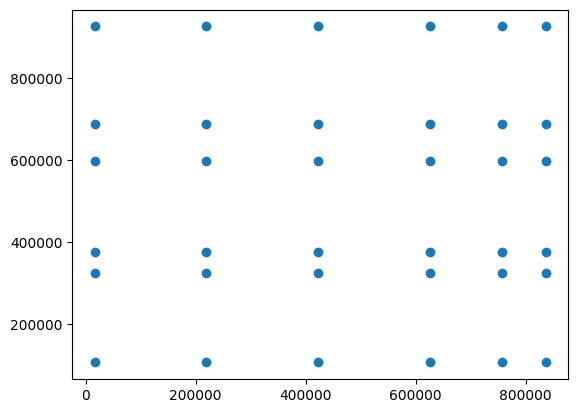

In [185]:
###Grid space used for RProp , 64 points in the space give sufficient coverage and i can train each for 4000 iter 
## and still have a total of 256000 epochs which is not too long for training 
from scipy.stats import qmc
from mpl_toolkits.mplot3d import Axes3D
# fig=plt.figure()
# ax=fig.add_subplot(111,projection='2d')
hyper=qmc.LatinHypercube(d=2)
samples=hyper.random(6)
upper=[1e6,1e6] ##will multiply by 1e-6 at some point, also the min changes each time we generate
lower=[0,0]
scaled=qmc.scale(samples,lower,upper)
X,Y=np.meshgrid(scaled[:,0],scaled[:,1])
plt.scatter(X,Y)
print(len(X.flatten()))
# plot=ax.scatter(X,Y)
print(np.min(X))

Testing RProp LR: 6.3e-01, Adam LR: 3.3e-01
Testing RProp LR: 2.2e-01, Adam LR: 3.3e-01
Testing RProp LR: 7.6e-01, Adam LR: 3.3e-01
Testing RProp LR: 1.7e-02, Adam LR: 3.3e-01
Testing RProp LR: 4.2e-01, Adam LR: 3.3e-01
Testing RProp LR: 8.4e-01, Adam LR: 3.3e-01
Testing RProp LR: 6.3e-01, Adam LR: 6.0e-01
Testing RProp LR: 2.2e-01, Adam LR: 6.0e-01
Testing RProp LR: 7.6e-01, Adam LR: 6.0e-01
Testing RProp LR: 1.7e-02, Adam LR: 6.0e-01
Testing RProp LR: 4.2e-01, Adam LR: 6.0e-01
Testing RProp LR: 8.4e-01, Adam LR: 6.0e-01
Testing RProp LR: 6.3e-01, Adam LR: 3.8e-01
Testing RProp LR: 2.2e-01, Adam LR: 3.8e-01
Testing RProp LR: 7.6e-01, Adam LR: 3.8e-01
Testing RProp LR: 1.7e-02, Adam LR: 3.8e-01
Testing RProp LR: 4.2e-01, Adam LR: 3.8e-01
Testing RProp LR: 8.4e-01, Adam LR: 3.8e-01
Testing RProp LR: 6.3e-01, Adam LR: 1.1e-01
Testing RProp LR: 2.2e-01, Adam LR: 1.1e-01
Testing RProp LR: 7.6e-01, Adam LR: 1.1e-01
Testing RProp LR: 1.7e-02, Adam LR: 1.1e-01
Testing RProp LR: 4.2e-01, Adam 

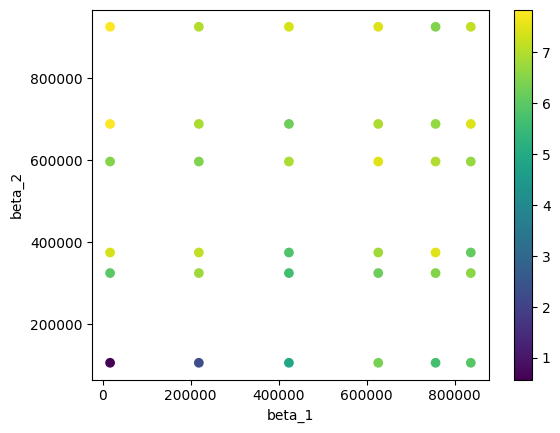

In [186]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad

            if grad is None:
                continue

            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus,
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()

# Training settings
input_dim = 12
hidden_units = 310
epochs = 2000
n_splits = 5  # Number of folds for cross-validation

# RProp and Adam fixed parameters
rprop_delta_plus = 31623.13926044511 * 1e-6
rprop_delta_minus = 10771.561362750432 * 1e-6
adam_beta1 = 0.838518587915633
adam_beta2 = 0.3984271570599476

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True)

# Prepare to store results
results_loss = np.zeros(X.shape)
results_acc = np.zeros(X.shape)

# Grid search over learning rates
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        lr_rprop = X[i, j]*1e-6
        lr_adam = Y[i, j]*1e-6
        print(f'Testing RProp LR: {lr_rprop:.1e}, Adam LR: {lr_adam:.1e}')

        # Reset loss and accuracy for this combination
        fold_validation_loss = []
        fold_validation_acc = []

        for fold, (train_index, valid_index) in enumerate(kf.split(inputs_training)):

            # Split data into training and validation sets
            inputs_train_fold = inputs_training[train_index]
            labels_train_fold = labels_training[train_index]
            inputs_valid_fold = inputs_training[valid_index]
            labels_valid_fold = labels_training[valid_index]

            # Initialize model and optimizers
            model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
            rprop_optimizer = RProp(model.parameters(), lr=lr_rprop, delta_plus=rprop_delta_plus, delta_minus=rprop_delta_minus)
            adam_optimizer = optim.Adam(model.parameters(), lr=lr_adam, betas=(adam_beta1, adam_beta2))

            # Reset loss and accuracy for this fold
            validation_loss = []
            validation_acc = []

            # Main training loop for this fold
            for epoch in range(epochs):
                model.train()
                rprop_optimizer.zero_grad()  # Zero the gradients for RProp
                adam_optimizer.zero_grad()  # Zero the gradients for Adam

                # Get training outputs and compute loss
                outputs = model(inputs_train_fold)
                loss = loss_func(labels_train_fold, outputs)
                loss.backward()  # Compute gradients

                # Store gradients for both optimizers
                rprop_gradients = {id(param): param.grad.clone() for param in model.parameters()}
                adam_gradients = {id(param): param.grad.clone() for param in model.parameters()}

                # Average the gradients
                for param in model.parameters():
                    param.grad = (rprop_gradients[id(param)] + adam_gradients[id(param)]) / 2

                # Update weights using both optimizers
                rprop_optimizer.step()  # Update weights with RProp
                adam_optimizer.step()   # Update weights with Adam

                # Validate after every epoch
                model.eval()
                with torch.no_grad():
                    val_outputs = model(inputs_valid_fold)
                    val_loss = loss_func(labels_valid_fold, val_outputs)
                    val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid_fold, dim=1)).float().mean().item()

                validation_loss.append(val_loss.item())
                validation_acc.append(val_acc)

            # Store average validation loss and accuracy for this fold
            fold_validation_loss.append(np.mean(validation_loss))
            fold_validation_acc.append(np.mean(validation_acc))

        # Store average results for this learning rate combination
        results_loss[i, j] = np.mean(fold_validation_loss)
        results_acc[i, j] = np.mean(fold_validation_acc)

plt.scatter(X, Y, c=results_loss, cmap='viridis')  
plt.colorbar()       
plt.xlabel('beta_1')
plt.ylabel('beta_2')
ind=np.argmin(results_loss)
print(X.flatten()[ind],Y.flatten()[ind])
# Print execution time
print("Execution time:", time.time() - start)


16642.177811819853 106286.46279598131


Text(0, 0.5, 'beta_2xe-6')

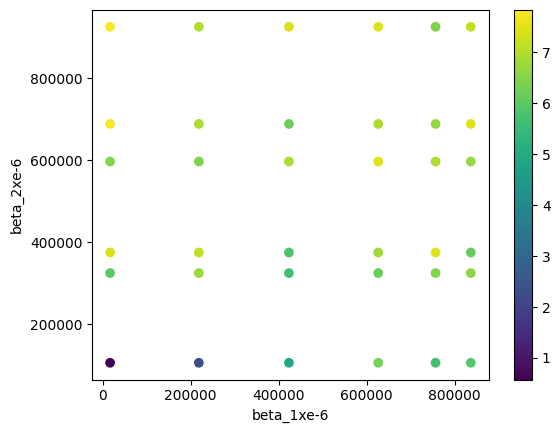

In [195]:
plt.scatter(X, Y, c=results_loss, cmap='viridis')  
ind=np.argmin(results_loss.flatten())
print(X.flatten()[ind],Y.flatten()[ind])
plt.colorbar()       
plt.xlabel('beta_1xe-6')
plt.ylabel('beta_2xe-6')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


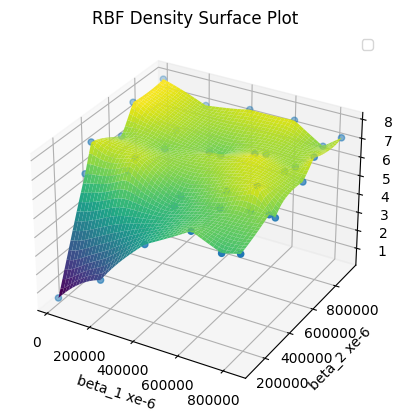

16642.077811819854 106286.3627959813


In [190]:
##for sigmoid w/o amsgrad 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D


x_data = X
y_data = Y
z_data = results_loss

# Fit RBF
rbf = Rbf(x_data, y_data, z_data,function='linear')  # You can choose 'linear', 'cubic', etc.

# Create grid for evaluation
grid_x, grid_y = np.linspace(np.min(x_data)-0.1, np.max(x_data)+0.1, 50), np.linspace(np.min(y_data)-0.1, np.max(y_data)+0.1, 50)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_z = rbf(grid_x, grid_y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.scatter(X,Y,results_loss)

ax.set_xlabel('beta_1 xe-6')
ax.set_ylabel('beta_2 xe-6')
ax.set_title('RBF Density Surface Plot')
plt.legend()
plt.show()
ind=np.argmin(grid_z.flatten())
print(grid_x.flatten()[ind],grid_y.flatten()[ind])


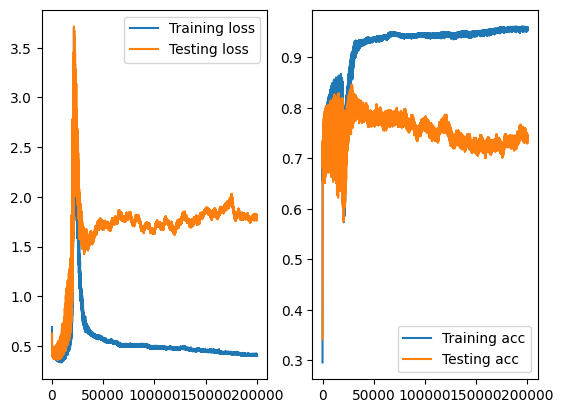

TypeError: 'NoneType' object is not callable

In [197]:
###now we trained the tuned hybrid NN over 200000 epochs with testing set 

import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad

            if grad is None:
                continue

            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus,
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()

# Training settings
input_dim = 12
hidden_units = 310
epochs = 200000
batch_size = 32

# Prepare for loss and accuracy tracking
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined
inputs_valid = torch.tensor(np.array(test_feat), dtype=torch.float32)  # Ensure valid_feat is defined , replaced with test stuff 
labels_valid = torch.tensor(bi_test_targ, dtype=torch.float32)  # Ensure bi_valid_targ is defined

# Initialize model and optimizers
model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
rprop_optimizer = RProp(model.parameters(), lr=16642.077811819854*1e-6, delta_plus=31623.13926044511*1e-6, delta_minus=10771.561362750432*1e-6)
adam_optimizer = optim.Adam(model.parameters(), lr=106286.3627959813e-7, betas=(0.838518587915633, 0.3984271570599476))

# Main training loop
for epoch in range(epochs):
    model.train()
    rprop_optimizer.zero_grad()  # Zero the gradients for RProp
    adam_optimizer.zero_grad()  # Zero the gradients for Adam

    # Get training outputs and compute loss
    outputs = model(inputs_training)
    loss = loss_func(labels_training, outputs)
    loss.backward()  # Compute gradients

    # Store gradients for both optimizers
    rprop_gradients = {id(param): param.grad.clone() for param in model.parameters()}
    adam_gradients = {id(param): param.grad.clone() for param in model.parameters()}

    # Average the gradients
    for param in model.parameters():
        param.grad = (rprop_gradients[id(param)] + adam_gradients[id(param)]) / 2

    # Update weights using both optimizers
    rprop_optimizer.step()  # Update weights with RProp
    adam_optimizer.step()   # Update weights with Adam

    # Store training loss
    training_loss.append(loss.item())

    # Calculate training accuracy
    train_acc = (torch.argmax(outputs, dim=1) == torch.argmax(labels_training, dim=1)).float().mean().item()
    training_acc.append(train_acc)

    # Validate after every epoch
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid)
        val_loss = loss_func(labels_valid, val_outputs)
        val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid, dim=1)).float().mean().item()

    validation_loss.append(val_loss.item())
    validation_acc.append(val_acc)
plt.subplot(121)
plt.plot(np.linspace(0, epochs, epochs), training_loss, label='Training loss')
plt.plot(np.linspace(0, epochs, epochs), validation_loss, label='Testing loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0, epochs, epochs), training_acc, label='Training acc')
plt.plot(np.linspace(0, epochs, epochs), validation_acc, label='Testing acc')
plt.legend()
plt.show()()

# Print execution time
print("Execution time:", time.time() - start)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


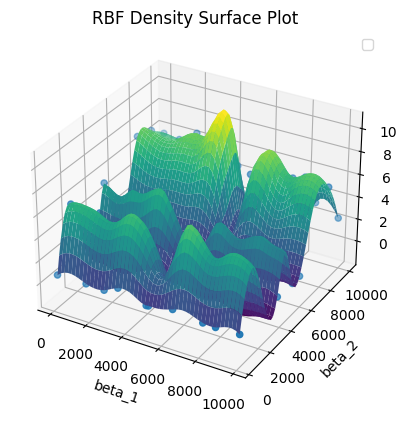

8302.840079591479 3339.1679732275293


In [147]:
##for interpolation, its easier to just use scipy.interpolate , but could also do it as above to get the pdf values at the inteprolated points and then color them like that

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D


x_data = X
y_data = Y
z_data = results_loss

# Fit RBF
rbf = Rbf(x_data, y_data, z_data,function='cubic')  # You can choose 'linear', 'cubic', etc.

# Create grid for evaluation
grid_x, grid_y = np.linspace(np.min(x_data), np.max(x_data), 50), np.linspace(np.min(y_data), np.max(y_data), 50)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_z = rbf(grid_x, grid_y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.scatter(X,Y,results_loss)

ax.set_xlabel('beta_1')
ax.set_ylabel('beta_2')
ax.set_title('RBF Density Surface Plot')
plt.legend()
plt.show()
ind=np.argmin(grid_z.flatten())
print(grid_x.flatten()[ind],grid_y.flatten()[ind])

100
722.984232622991


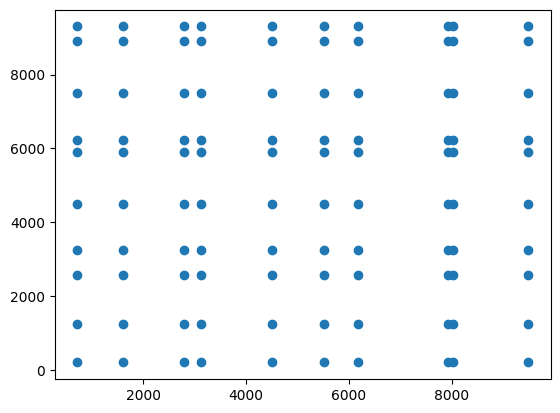

In [152]:
###Grid space used for RProp , 64 points in the space give sufficient coverage and i can train each for 4000 iter 
## and still have a total of 256000 epochs which is not too long for training 
from scipy.stats import qmc
from mpl_toolkits.mplot3d import Axes3D
# fig=plt.figure()
# ax=fig.add_subplot(111,projection='2d')
hyper=qmc.LatinHypercube(d=2)
samples=hyper.random(10)
upper=[1e4,1e4] ##will multiply by 1e-6 at some point, also the min changes each time we generate
lower=[0,0]
scaled=qmc.scale(samples,lower,upper)
X,Y=np.meshgrid(scaled[:,0],scaled[:,1])
plt.scatter(X,Y)
print(len(X.flatten()))
# plot=ax.scatter(X,Y)
print(np.min(X))

In [153]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad

            if grad is None:
                continue

            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus,
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()

# Training settings
input_dim = 12
hidden_units = 35
epochs = 50000
n_splits = 5  # Number of folds for cross-validation

# RProp and Adam fixed parameters
rprop_delta_plus = 31623.13926044511 * 1e-6
rprop_delta_minus = 10771.561362750432 * 1e-6
adam_beta1 = 0.838518587915633
adam_beta2 = 0.3984271570599476

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True)

# Prepare to store results
results_loss1 = np.zeros(X.shape)
results_acc1 = np.zeros(X.shape)

# Grid search over learning rates
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        lr_rprop = X[i, j]*1e-6
        lr_adam = Y[i, j]*1e-6
        print(f'Testing RProp LR: {lr_rprop:.1e}, Adam LR: {lr_adam:.1e}')

        # Reset loss and accuracy for this combination
        fold_validation_loss = []
        fold_validation_acc = []

        for fold, (train_index, valid_index) in enumerate(kf.split(inputs_training)):

            # Split data into training and validation sets
            inputs_train_fold = inputs_training[train_index]
            labels_train_fold = labels_training[train_index]
            inputs_valid_fold = inputs_training[valid_index]
            labels_valid_fold = labels_training[valid_index]

            # Initialize model and optimizers
            model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
            rprop_optimizer = RProp(model.parameters(), lr=lr_rprop, delta_plus=rprop_delta_plus, delta_minus=rprop_delta_minus)
            adam_optimizer = optim.Adam(model.parameters(), lr=lr_adam, betas=(adam_beta1, adam_beta2))

            # Reset loss and accuracy for this fold
            validation_loss = []
            validation_acc = []

            # Main training loop for this fold
            for epoch in range(epochs):
                model.train()
                rprop_optimizer.zero_grad()  # Zero the gradients for RProp
                adam_optimizer.zero_grad()  # Zero the gradients for Adam

                # Get training outputs and compute loss
                outputs = model(inputs_train_fold)
                loss = loss_func(labels_train_fold, outputs)
                loss.backward()  # Compute gradients

                # Store gradients for both optimizers
                rprop_gradients = {id(param): param.grad.clone() for param in model.parameters()}
                adam_gradients = {id(param): param.grad.clone() for param in model.parameters()}

                # Average the gradients
                for param in model.parameters():
                    param.grad = (rprop_gradients[id(param)] + adam_gradients[id(param)]) / 2

                # Update weights using both optimizers
                rprop_optimizer.step()  # Update weights with RProp
                adam_optimizer.step()   # Update weights with Adam

                # Validate after every epoch
                model.eval()
                with torch.no_grad():
                    val_outputs = model(inputs_valid_fold)
                    val_loss = loss_func(labels_valid_fold, val_outputs)
                    val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid_fold, dim=1)).float().mean().item()

                validation_loss.append(val_loss.item())
                validation_acc.append(val_acc)

            # Store average validation loss and accuracy for this fold
            fold_validation_loss.append(np.mean(validation_loss))
            fold_validation_acc.append(np.mean(validation_acc))

        # Store average results for this learning rate combination
        results_loss1[i, j] = np.mean(fold_validation_loss)
        results_acc1[i, j] = np.mean(fold_validation_acc)

# Plotting results
plt.figure(figsize=(12, 6))

# Loss heatmap
plt.subplot(121)
plt.imshow(results_loss1, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(X.shape[1]), [f'{lr:.1e}' for lr in Y[0]])
plt.yticks(np.arange(X.shape[0]), [f'{lr:.1e}' for lr in X[:, 0]])
plt.xlabel('Adam Learning Rate')
plt.ylabel('RProp Learning Rate')
plt.title('Validation Loss Heatmap')

# Accuracy heatmap
plt.subplot(122)
plt.imshow(results_acc1, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(X.shape[1]), [f'{lr:.1e}' for lr in Y[0]])
plt.yticks(np.arange(X.shape[0]), [f'{lr:.1e}' for lr in X[:, 0]])
plt.xlabel('Adam Learning Rate')
plt.ylabel('RProp Learning Rate')
plt.title('Validation Accuracy Heatmap')

plt.tight_layout()
plt.show()

# Print execution time
print("Execution time:", time.time() - start)


Testing RProp LR: 4.5e-03, Adam LR: 6.2e-03
Testing RProp LR: 7.9e-03, Adam LR: 6.2e-03
Testing RProp LR: 7.2e-04, Adam LR: 6.2e-03
Testing RProp LR: 2.8e-03, Adam LR: 6.2e-03
Testing RProp LR: 9.5e-03, Adam LR: 6.2e-03
Testing RProp LR: 1.6e-03, Adam LR: 6.2e-03
Testing RProp LR: 3.1e-03, Adam LR: 6.2e-03
Testing RProp LR: 6.2e-03, Adam LR: 6.2e-03
Testing RProp LR: 5.5e-03, Adam LR: 6.2e-03
Testing RProp LR: 8.0e-03, Adam LR: 6.2e-03
Testing RProp LR: 4.5e-03, Adam LR: 1.3e-03
Testing RProp LR: 7.9e-03, Adam LR: 1.3e-03
Testing RProp LR: 7.2e-04, Adam LR: 1.3e-03
Testing RProp LR: 2.8e-03, Adam LR: 1.3e-03
Testing RProp LR: 9.5e-03, Adam LR: 1.3e-03
Testing RProp LR: 1.6e-03, Adam LR: 1.3e-03
Testing RProp LR: 3.1e-03, Adam LR: 1.3e-03
Testing RProp LR: 6.2e-03, Adam LR: 1.3e-03
Testing RProp LR: 5.5e-03, Adam LR: 1.3e-03
Testing RProp LR: 8.0e-03, Adam LR: 1.3e-03
Testing RProp LR: 4.5e-03, Adam LR: 8.9e-03
Testing RProp LR: 7.9e-03, Adam LR: 8.9e-03
Testing RProp LR: 7.2e-04, Adam 

KeyboardInterrupt: 

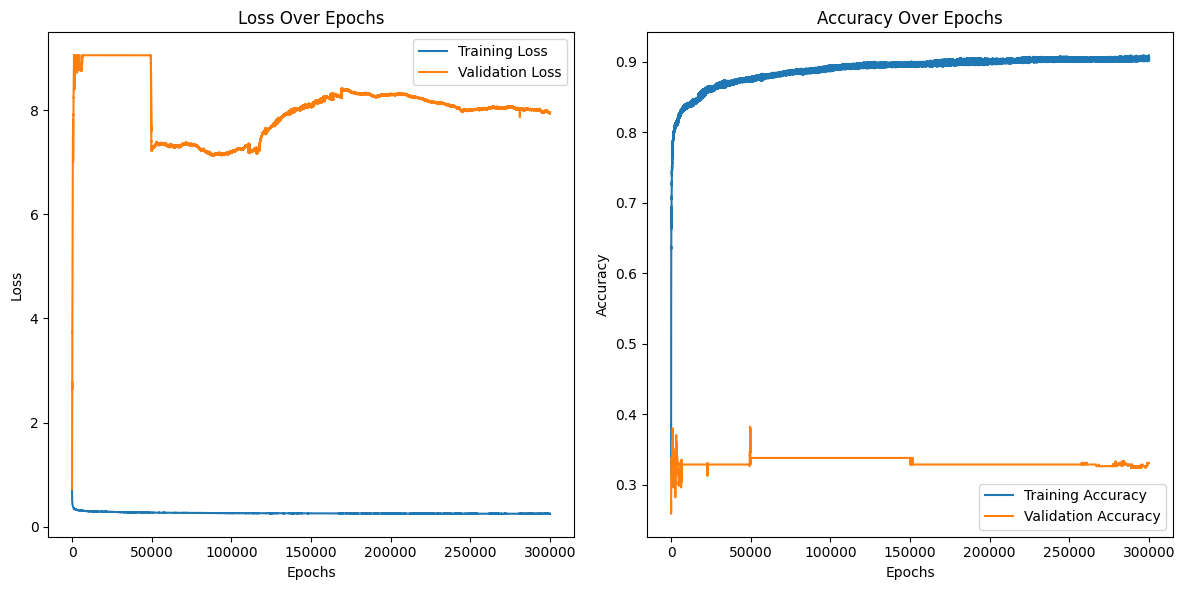

Execution time: 1027.1192626953125


In [151]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad

            if grad is None:
                continue

            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus,
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()

# Training settings
input_dim = 12
hidden_units = 35
epochs = 300000
batch_size = 32

# Prepare for loss and accuracy tracking
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined
inputs_valid = torch.tensor(valid_feat, dtype=torch.float32)  # Ensure valid_feat is defined
labels_valid = torch.tensor(bi_valid_targ, dtype=torch.float32)  # Ensure bi_valid_targ is defined

# Initialize model and optimizers
model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
rprop_optimizer = RProp(model.parameters(), lr=8302.840079591479e-6, delta_plus=31623.13926044511*1e-6, delta_minus=10771.561362750432*1e-6)
adam_optimizer = optim.Adam(model.parameters(), lr= 3339.1679732275293e-6, betas=(0.838518587915633, 0.3984271570599476))

# Main training loop
for epoch in range(epochs):
    model.train()
    rprop_optimizer.zero_grad()  # Zero the gradients for RProp
    adam_optimizer.zero_grad()  # Zero the gradients for Adam

    # Get training outputs and compute loss
    outputs = model(inputs_training)
    loss = loss_func(labels_training, outputs)
    loss.backward()  # Compute gradients

    # Store gradients for both optimizers
    rprop_gradients = {id(param): param.grad.clone() for param in model.parameters()}
    adam_gradients = {id(param): param.grad.clone() for param in model.parameters()}

    # Average the gradients
    for param in model.parameters():
        param.grad = (rprop_gradients[id(param)] + adam_gradients[id(param)]) / 2

    # Update weights using both optimizers
    rprop_optimizer.step()  # Update weights with RProp
    adam_optimizer.step()   # Update weights with Adam

    # Store training loss
    training_loss.append(loss.item())

    # Calculate training accuracy
    train_acc = (torch.argmax(outputs, dim=1) == torch.argmax(labels_training, dim=1)).float().mean().item()
    training_acc.append(train_acc)

    # Validate after every epoch
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid)
        val_loss = loss_func(labels_valid, val_outputs)
        val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid, dim=1)).float().mean().item()

    validation_loss.append(val_loss.item())
    validation_acc.append(val_acc)

# Plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(121)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(122)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print execution time
print("Execution time:", time.time() - start)


In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# RProp Optimizer
class RProp:
    def __init__(self, params, lr=0.001, delta_plus=0.1, delta_minus=0.1):
        self.lr = lr
        self.delta_plus = delta_plus
        self.delta_minus = delta_minus
        self.params = list(params)
        self.prev_gradients = {id(param): torch.zeros_like(param) for param in self.params}
        self.deltas = {id(param): torch.full_like(param, 0.1) for param in self.params}

    def zero_grad(self):
        pass  # No action needed

    def step(self):
        for param in self.params:
            param_id = id(param)
            grad = param.grad

            if grad is None:
                continue

            new_grad = torch.where(grad == 0, self.prev_gradients[param_id], grad)
            grad_sign = torch.sign(new_grad) * torch.sign(self.prev_gradients[param_id])

            self.deltas[param_id] += torch.where(grad_sign > 0, self.delta_plus,
                                                  torch.where(grad_sign < 0, -self.delta_minus, 0))
            self.deltas[param_id] = torch.clamp(self.deltas[param_id], min=1e-6, max=50.0)

            param.data -= torch.sign(new_grad) * self.deltas[param_id] * self.lr
            self.prev_gradients[param_id] = new_grad.detach()

# Training settings
input_dim = 12
hidden_units = 35
epochs = 1000000
batch_size = 32

# Prepare for loss and accuracy tracking
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined
inputs_valid = torch.tensor(valid_feat, dtype=torch.float32)  # Ensure valid_feat is defined
labels_valid = torch.tensor(bi_valid_targ, dtype=torch.float32)  # Ensure bi_valid_targ is defined

# Initialize model and optimizers
model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
rprop_optimizer = RProp(model.parameters(), lr=77760.63731869662*1e-6, delta_plus=31623.13926044511*1e-6, delta_minus=10771.561362750432*1e-6)
adam_optimizer = optim.Adam(model.parameters(), lr=83787.77689266898e-6, betas=(0.838518587915633, 0.3984271570599476))

# Main training loop
for epoch in range(epochs):
    model.train()
    rprop_optimizer.zero_grad()  # Zero the gradients for RProp
    adam_optimizer.zero_grad()  # Zero the gradients for Adam

    # Get training outputs and compute loss
    outputs = model(inputs_training)
    loss = loss_func(labels_training, outputs)
    loss.backward()  # Compute gradients

    # Store gradients for both optimizers
    rprop_gradients = {id(param): param.grad.clone() for param in model.parameters()}
    adam_gradients = {id(param): param.grad.clone() for param in model.parameters()}

    # Average the gradients
    for param in model.parameters():
        param.grad = (rprop_gradients[id(param)] + adam_gradients[id(param)]) / 2

    # Update weights using both optimizers
    rprop_optimizer.step()  # Update weights with RProp
    adam_optimizer.step()   # Update weights with Adam

    # Store training loss
    training_loss.append(loss.item())

    # Calculate training accuracy
    train_acc = (torch.argmax(outputs, dim=1) == torch.argmax(labels_training, dim=1)).float().mean().item()
    training_acc.append(train_acc)

    # Validate after every epoch
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid)
        val_loss = loss_func(labels_valid, val_outputs)
        val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid, dim=1)).float().mean().item()

    validation_loss.append(val_loss.item())
    validation_acc.append(val_acc)

# Plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(121)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(122)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print execution time
print("Execution time:", time.time() - start)


36


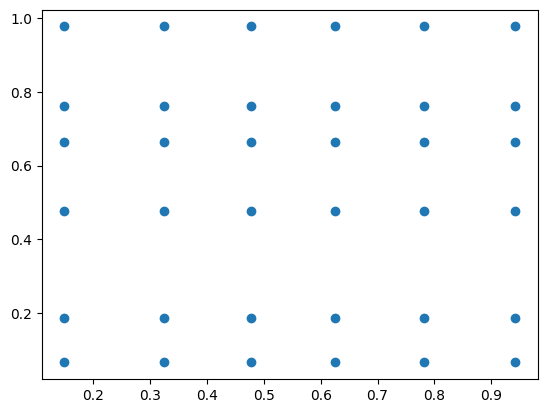

In [158]:
####for sigmoid stuff
from scipy.stats import qmc
hyper=qmc.LatinHypercube(d=2)
samples=hyper.random(6)
upper=[1,1]
lower=[1e-3,1e-3]
scaled=qmc.scale(samples,lower,upper)
X,Y=np.meshgrid(scaled[:,0],scaled[:,1])
print(len(X.flatten()))
plt.scatter(X,Y)

0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
0.9419605755699925 0.977300683515985


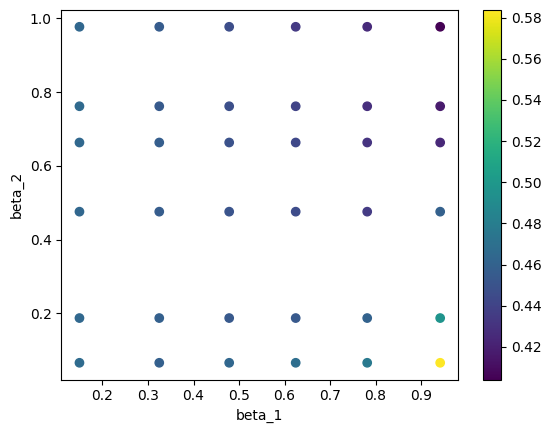

In [160]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# Training settings
input_dim = 12
hidden_units = 310
epochs = 2000
n_splits = 5  # Number of folds for cross-validation

# Adam fixed parameters
adam_beta1 = 0.838518587915633
adam_beta2 = 0.3984271570599476

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True)

# Prepare to store results
results_loss = np.zeros(X.shape)
results_acc = np.zeros(X.shape)

# Grid search over learning rates
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        lr_adam = 48028.2914*1e-7
        adam_beta1 = X[i,j]
        adam_beta2 = Y[i,j]
        print(i)

        # Reset loss and accuracy for this combination
        fold_validation_loss = []
        fold_validation_acc = []

        for fold, (train_index, valid_index) in enumerate(kf.split(inputs_training)):

            # Split data into training and validation sets
            inputs_train_fold = inputs_training[train_index]
            labels_train_fold = labels_training[train_index]
            inputs_valid_fold = inputs_training[valid_index]
            labels_valid_fold = labels_training[valid_index]

            # Initialize model and Adam optimizer
            model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
            adam_optimizer = optim.Adam(model.parameters(), lr=lr_adam, betas=(adam_beta1, adam_beta2),amsgrad=False)

            # Reset loss and accuracy for this fold
            validation_loss = []
            validation_acc = []

            # Main training loop for this fold
            for epoch in range(epochs):
                model.train()
                adam_optimizer.zero_grad()  # Zero the gradients for Adam

                # Get training outputs and compute loss
                outputs = model(inputs_train_fold)
                loss = loss_func(labels_train_fold, outputs)
                loss.backward()  # Compute gradients

                # Update weights using Adam
                adam_optimizer.step()   # Update weights with Adam

                # Validate after every epoch
                model.eval()
                with torch.no_grad():
                    val_outputs = model(inputs_valid_fold)
                    val_loss = loss_func(labels_valid_fold, val_outputs)
                    val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid_fold, dim=1)).float().mean().item()

                validation_loss.append(val_loss.item())
                validation_acc.append(val_acc)

            # Store average validation loss and accuracy for this fold
            fold_validation_loss.append(np.mean(validation_loss))
            fold_validation_acc.append(np.mean(validation_acc))

        # Store average results for this learning rate combination
        results_loss[i, j] = np.mean(fold_validation_loss)
        results_acc[i, j] = np.mean(fold_validation_acc)

plt.scatter(X, Y, c=results_loss, cmap='viridis')  
plt.colorbar()       
plt.xlabel('beta_1')
plt.ylabel('beta_2')
ind=np.argmin(results_loss)
print(X.flatten()[ind],Y.flatten()[ind])



0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
0.9419605755699925 0.977300683515985


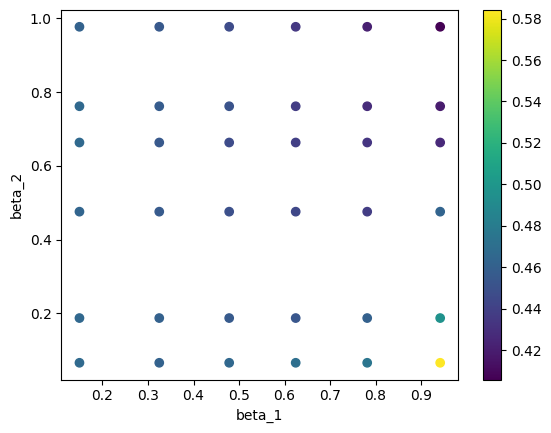

In [161]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# Training settings
input_dim = 12
hidden_units = 310
epochs = 2000
n_splits = 5  # Number of folds for cross-validation

# Adam fixed parameters
adam_beta1 = 0.838518587915633
adam_beta2 = 0.3984271570599476

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True)

# Prepare to store results
results_loss2 = np.zeros(X.shape)
results_acc2 = np.zeros(X.shape)

# Grid search over learning rates
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        lr_adam = 48028.2914*1e-7
        adam_beta1 = X[i,j]
        adam_beta2 = Y[i,j]
        print(i)

        # Reset loss and accuracy for this combination
        fold_validation_loss = []
        fold_validation_acc = []

        for fold, (train_index, valid_index) in enumerate(kf.split(inputs_training)):

            # Split data into training and validation sets
            inputs_train_fold = inputs_training[train_index]
            labels_train_fold = labels_training[train_index]
            inputs_valid_fold = inputs_training[valid_index]
            labels_valid_fold = labels_training[valid_index]

            # Initialize model and Adam optimizer
            model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
            adam_optimizer = optim.Adam(model.parameters(), lr=lr_adam, betas=(adam_beta1, adam_beta2),amsgrad=False)

            # Reset loss and accuracy for this fold
            validation_loss = []
            validation_acc = []

            # Main training loop for this fold
            for epoch in range(epochs):
                model.train()
                adam_optimizer.zero_grad()  # Zero the gradients for Adam

                # Get training outputs and compute loss
                outputs = model(inputs_train_fold)
                loss = loss_func(labels_train_fold, outputs)
                loss.backward()  # Compute gradients

                # Update weights using Adam
                adam_optimizer.step()   # Update weights with Adam

                # Validate after every epoch
                model.eval()
                with torch.no_grad():
                    val_outputs = model(inputs_valid_fold)
                    val_loss = loss_func(labels_valid_fold, val_outputs)
                    val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid_fold, dim=1)).float().mean().item()

                validation_loss.append(val_loss.item())
                validation_acc.append(val_acc)

            # Store average validation loss and accuracy for this fold
            fold_validation_loss.append(np.mean(validation_loss))
            fold_validation_acc.append(np.mean(validation_acc))

        # Store average results for this learning rate combination
        results_loss2[i, j] = np.mean(fold_validation_loss)
        results_acc2[i, j] = np.mean(fold_validation_acc)

plt.scatter(X, Y, c=results_loss2, cmap='viridis')  
plt.colorbar()       
plt.xlabel('beta_1')
plt.ylabel('beta_2')
ind=np.argmin(results_loss2)
print(X.flatten()[ind],Y.flatten()[ind])



0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
4
5
5
5
5
5
5
0.9419605755699925 0.977300683515985


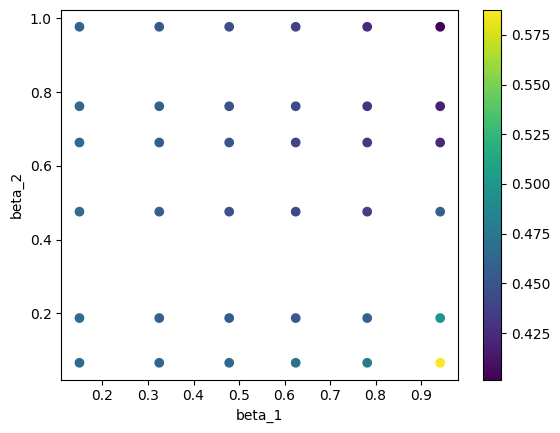

In [162]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Initialize the timer
start = time.time()

# Define the model
class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Use Sigmoid as output activation
        return x

# Custom loss function
def loss_func(labels, predictions):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# Training settings
input_dim = 12
hidden_units = 310
epochs = 2000
n_splits = 5  # Number of folds for cross-validation

# Adam fixed parameters
adam_beta1 = 0.838518587915633
adam_beta2 = 0.3984271570599476

# Convert data to tensors
inputs_training = torch.tensor(train_feat, dtype=torch.float32)  # Ensure train_feat is defined
labels_training = torch.tensor(bi_train_targ, dtype=torch.float32)  # Ensure bi_train_targ is defined

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True)

# Prepare to store results
results_loss3 = np.zeros(X.shape)
results_acc3 = np.zeros(X.shape)

# Grid search over learning rates
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        lr_adam = 48028.2914*1e-7
        adam_beta1 = X[i,j]
        adam_beta2 = Y[i,j]
        print(i)

        # Reset loss and accuracy for this combination
        fold_validation_loss = []
        fold_validation_acc = []

        for fold, (train_index, valid_index) in enumerate(kf.split(inputs_training)):

            # Split data into training and validation sets
            inputs_train_fold = inputs_training[train_index]
            labels_train_fold = labels_training[train_index]
            inputs_valid_fold = inputs_training[valid_index]
            labels_valid_fold = labels_training[valid_index]

            # Initialize model and Adam optimizer
            model = SimpleModel(input_dim=input_dim, hidden_units=hidden_units)
            adam_optimizer = optim.Adam(model.parameters(), lr=lr_adam, betas=(adam_beta1, adam_beta2),amsgrad=False)

            # Reset loss and accuracy for this fold
            validation_loss = []
            validation_acc = []

            # Main training loop for this fold
            for epoch in range(epochs):
                model.train()
                adam_optimizer.zero_grad()  # Zero the gradients for Adam

                # Get training outputs and compute loss
                outputs = model(inputs_train_fold)
                loss = loss_func(labels_train_fold, outputs)
                loss.backward()  # Compute gradients

                # Update weights using Adam
                adam_optimizer.step()   # Update weights with Adam

                # Validate after every epoch
                model.eval()
                with torch.no_grad():
                    val_outputs = model(inputs_valid_fold)
                    val_loss = loss_func(labels_valid_fold, val_outputs)
                    val_acc = (torch.argmax(val_outputs, dim=1) == torch.argmax(labels_valid_fold, dim=1)).float().mean().item()

                validation_loss.append(val_loss.item())
                validation_acc.append(val_acc)

            # Store average validation loss and accuracy for this fold
            fold_validation_loss.append(np.mean(validation_loss))
            fold_validation_acc.append(np.mean(validation_acc))

        # Store average results for this learning rate combination
        results_loss3[i, j] = np.mean(fold_validation_loss)
        results_acc3[i, j] = np.mean(fold_validation_acc)

plt.scatter(X, Y, c=results_loss3, cmap='viridis')  
plt.colorbar()       
plt.xlabel('beta_1')
plt.ylabel('beta_2')
ind=np.argmin(results_loss2)
print(X.flatten()[ind],Y.flatten()[ind])



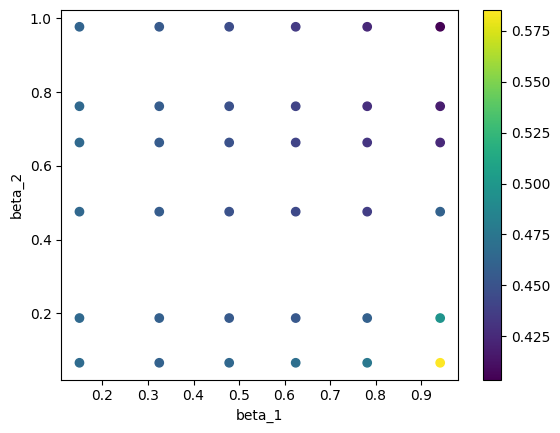

In [169]:
combined_results=1/3*(results_loss+results_loss2+results_loss3)
plt.scatter(X,Y,c=combined_results,cmap='viridis')
plt.xlabel('beta_1')
plt.ylabel('beta_2')
plt.colorbar()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


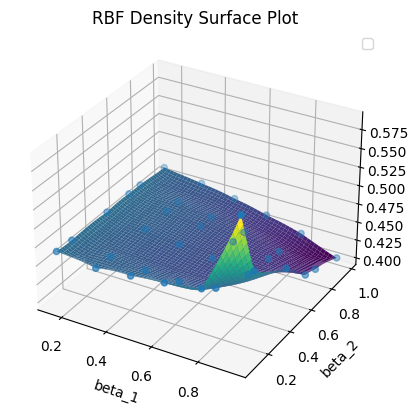

0.9419605755699925 0.977300683515985


In [172]:
##for sig with amsgrad 
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D


x_data = X
y_data = Y
z_data = combined_results

# Fit RBF
rbf = Rbf(x_data, y_data, z_data,function='linear')  # You can choose 'linear', 'cubic', etc.

# Create grid for evaluation
grid_x, grid_y = np.linspace(np.min(x_data), np.max(x_data), 50), np.linspace(np.min(y_data), np.max(y_data), 50)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_z = rbf(grid_x, grid_y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis')
ax.scatter(X,Y,combined_results)

ax.set_xlabel('beta_1')
ax.set_ylabel('beta_2')
ax.set_title('RBF Density Surface Plot')
plt.legend()
plt.show()
ind=np.argmin(grid_z.flatten())
print(grid_x.flatten()[ind],grid_y.flatten()[ind])


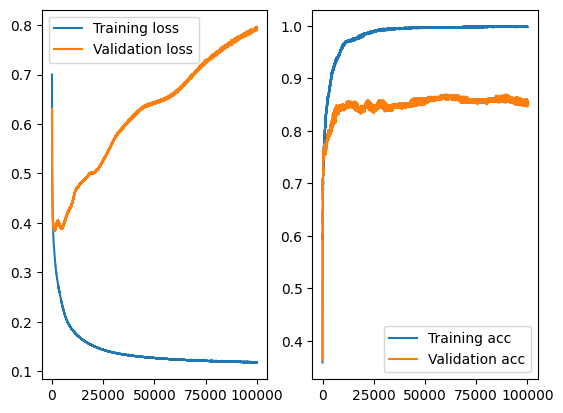

Execution time:  459.6061294078827


In [174]:
###now training on grid search results, same as interpolation results in this case 
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

start = time.time()

# Define the model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_units, output_activation):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)
        self.activation = nn.Tanh()
        self.output_activation = nn.Sigmoid() if output_activation == 'sigmoid' else None

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        if self.output_activation:
            x = self.output_activation(x)
        return x

# Custom loss function
def loss_func(predictions, labels):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# Function to ensure tensor conversion
def to_tensor(data):
    if isinstance(data, np.ndarray):  # Check if it's a NumPy array
        return torch.tensor(data, dtype=torch.float32)  # Convert to tensor
    elif isinstance(data, torch.Tensor):  # If it's already a tensor
        return data.clone().detach()  # Just clone and detach
    raise TypeError("Unsupported data type for conversion to tensor.")

# Training settings
input_dim = 12
hidden_units = 310
output_activation = 'sigmoid'
model = SimpleNN(input_dim, hidden_units, output_activation)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=48028.2914e-7 , betas=(0.9419605755699925, 0.977300683515985),amsgrad=False)

# Training variables
epochs = 100000
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert inputs to tensors once outside the loop
inputs_training_tensor = to_tensor(inputs_training)
labels_training_tensor = to_tensor(labels_training)
inputs_valid_tensor = to_tensor(inputs_valid)
labels_valid_tensor = to_tensor(labels_valid)

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(inputs_training_tensor)
    
    # Compute loss
    loss = loss_func(outputs, labels_training_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Store training loss
    training_loss.append(loss.item())
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid_tensor)
        val_loss = loss_func(val_outputs, labels_valid_tensor)
        validation_loss.append(val_loss.item())

    # Compute accuracy
    _, predicted = torch.max(outputs, 1)
    training_acc.append((predicted == labels_training_tensor.argmax(dim=1)).float().mean().item())
    _, val_predicted = torch.max(val_outputs, 1)
    validation_acc.append((val_predicted == labels_valid_tensor.argmax(dim=1)).float().mean().item())

# Plotting results
plt.subplot(121)
plt.plot(np.linspace(0, epochs, epochs), training_loss, label='Training loss')
plt.plot(np.linspace(0, epochs, epochs), validation_loss, label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0, epochs, epochs), training_acc, label='Training acc')
plt.plot(np.linspace(0, epochs, epochs), validation_acc, label='Validation acc')
plt.legend()
plt.show()

# Measure execution time
print("Execution time: ", time.time() - start)


In [ ]:
###now training on interpolation results
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

start = time.time()

# Define the model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_units, output_activation):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_units)
        self.fc2 = nn.Linear(hidden_units, 3)
        self.activation = nn.Tanh()
        self.output_activation = nn.Sigmoid() if output_activation == 'sigmoid' else None

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        if self.output_activation:
            x = self.output_activation(x)
        return x

# Custom loss function
def loss_func(predictions, labels):
    epsilon = 1e-7  # To avoid log(0)
    predictions = torch.clamp(predictions, epsilon, 1. - epsilon)
    return -torch.mean(labels * torch.log(predictions) + (1 - labels) * torch.log(1 - predictions))

# Function to ensure tensor conversion
def to_tensor(data):
    if isinstance(data, np.ndarray):  # Check if it's a NumPy array
        return torch.tensor(data, dtype=torch.float32)  # Convert to tensor
    elif isinstance(data, torch.Tensor):  # If it's already a tensor
        return data.clone().detach()  # Just clone and detach
    raise TypeError("Unsupported data type for conversion to tensor.")

# Training settings
input_dim = 12
hidden_units = 310
output_activation = 'sigmoid'
model = SimpleNN(input_dim, hidden_units, output_activation)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=48028.2914e-7 , betas=(0.9419605755699925, 0.977300683515985),amsgrad=False)

# Training variables
epochs = 50000
training_loss = []
validation_loss = []
training_acc = []
validation_acc = []

# Convert inputs to tensors once outside the loop
inputs_training_tensor = to_tensor(inputs_training)
labels_training_tensor = to_tensor(labels_training)
inputs_valid_tensor = to_tensor(inputs_valid)
labels_valid_tensor = to_tensor(labels_valid)

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(inputs_training_tensor)
    
    # Compute loss
    loss = loss_func(outputs, labels_training_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Store training loss
    training_loss.append(loss.item())
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(inputs_valid_tensor)
        val_loss = loss_func(val_outputs, labels_valid_tensor)
        validation_loss.append(val_loss.item())

    # Compute accuracy
    _, predicted = torch.max(outputs, 1)
    training_acc.append((predicted == labels_training_tensor.argmax(dim=1)).float().mean().item())
    _, val_predicted = torch.max(val_outputs, 1)
    validation_acc.append((val_predicted == labels_valid_tensor.argmax(dim=1)).float().mean().item())

# Plotting results
plt.subplot(121)
plt.plot(np.linspace(0, epochs, epochs), training_loss, label='Training loss')
plt.plot(np.linspace(0, epochs, epochs), validation_loss, label='Validation loss')
plt.legend()
plt.subplot(122)
plt.plot(np.linspace(0, epochs, epochs), training_acc, label='Training acc')
plt.plot(np.linspace(0, epochs, epochs), validation_acc, label='Validation acc')
plt.legend()
plt.show()

# Measure execution time
print("Execution time: ", time.time() - start)
